# Demographic Data Exploration

Making some static graphs for faculty review and future report/paper

In [3]:
# Load packages 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns         
import numpy as np
import os

# Remove max columns
pd.set_option('display.max_columns', None)

In [4]:
# Import data
base_dir = "/capstone/justice40"

# 2.0 communities files (from current CEJST website)
comm_v2 = pd.read_csv(os.path.join(base_dir, "data", "2.0-communities.csv"))

/tmp/ipykernel_43636/4079193624.py:5: DtypeWarning: Columns (18,29,73,75,88,134) have mixed types. Specify dtype option on import or set low_memory=False.
  comm_v2 = pd.read_csv(os.path.join(base_dir, "data", "2.0-communities.csv"))


In [5]:
# Filter to racial/ethnic groups
dem = comm_v2[['Census tract 2010 ID', 'County Name', 'State/Territory', 'Percent Black or African American alone', 'Percent American Indian / Alaska Native', 'Percent Asian', 'Percent Native Hawaiian or Pacific', 'Percent two or more races', 'Percent White', 'Percent Hispanic or Latino', 'Percent other races', 'Total threshold criteria exceeded', 'Total categories exceeded', 'Identified as disadvantaged', 'Percentage of tract that is disadvantaged by area', 'Total population']]

# Rename columns
dem = dem.rename(columns={
    'Census tract 2010 ID': 'tract_id',
    'County Name':'county',
    'State/Territory':'state',
    'Percent Black or African American alone':'black',
    'Percent American Indian / Alaska Native':'american_indian_alaskan_native',
    'Percent Asian':'asian',
    'Percent Native Hawaiian or Pacific':'native_hawaiian_pacific_islander',
    'Percent two or more races':'two_or_more_races',
    'Percent White':'white',
    'Percent Hispanic or Latino':'hispanic_latino',
    'Percent other races':'other_races',
    'Total threshold criteria exceeded':'total_criteria', 
    'Total categories exceeded':'total_burdens', 
    'Identified as disadvantaged':'dac', 
    'Percentage of tract that is disadvantaged by area':'percent_area_dac', 
    'Total population':'total_population'
})

dem.head()

,tract_id,county,state,black,american_indian_alaskan_native,asian,native_hawaiian_pacific_islander,two_or_more_races,white,hispanic_latino,other_races,total_criteria,total_burdens,dac,percent_area_dac,total_population
0,1001020100,Autauga County,Alabama,0.07,0.0,0.00,0.00,0.07,0.83,0.01,0.00,0,0.0,False,0,1993.0
1,1001020200,Autauga County,Alabama,0.57,0.0,0.00,0.01,0.02,0.38,0.01,0.00,0,0.0,False,0,1959.0
2,1001020300,Autauga County,Alabama,0.24,0.0,0.00,0.00,0.02,0.65,0.06,0.06,0,0.0,False,0,3507.0
3,1001020400,Autauga County,Alabama,0.05,0.0,0.00,0.00,0.03,0.89,0.01,0.00,0,0.0,False,0,3878.0
4,1001020500,Autauga County,Alabama,0.18,0.0,0.03,0.00,0.02,0.70,0.04,0.00,0,0.0,False,0,10596.0


In [6]:
dem.dtypes

tract_id                              int64
county                               object
state                                object
black                               float64
american_indian_alaskan_native      float64
asian                               float64
native_hawaiian_pacific_islander    float64
two_or_more_races                   float64
white                               float64
hispanic_latino                     float64
other_races                         float64
total_criteria                        int64
total_burdens                       float64
dac                                    bool
percent_area_dac                      int64
total_population                    float64
dtype: object

In [7]:
# dem.to_csv('../data/demographics.csv', index=False)

# Melt the dataframe to make it easier to plot
racial_columns = [
    "black", "american_indian_alaskan_native", "asian",
    "native_hawaiian_pacific_islander", "two_or_more_races",
    "white", "hispanic_latino", "other_races"
]

df_melted = dem.melt(id_vars=["total_burdens"], value_vars=racial_columns, 
                    var_name="racial_group", value_name="percentage")
df_melted.head()

,total_burdens,racial_group,percentage
0,0.0,black,0.07
1,0.0,black,0.57
2,0.0,black,0.24
3,0.0,black,0.05
4,0.0,black,0.18


<Axes: xlabel='racial_group'>

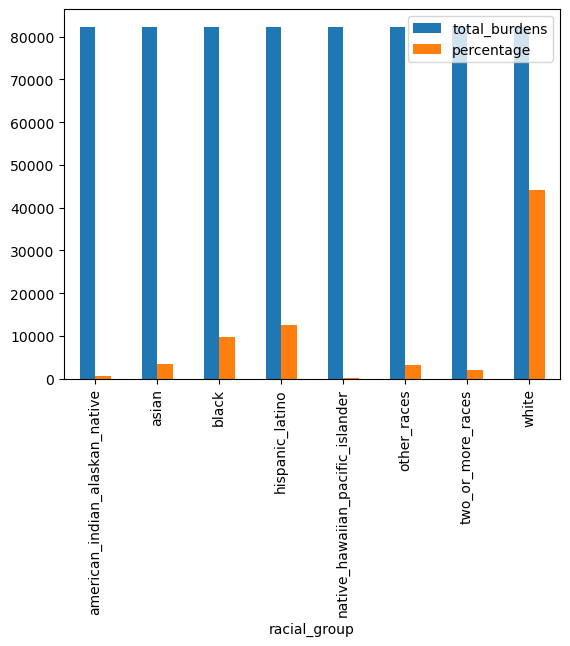

In [8]:
df_melted.groupby('racial_group').sum().plot(kind='bar')


In [ ]:
df_melted['total_burdens'] = df_melted['total_burdens'].astype('category') 
df_melted.dtypes

,total_burdens,racial_group,percentage
0,0.0,black,0.07
1,0.0,black,0.57
2,0.0,black,0.24
3,0.0,black,0.05
4,0.0,black,0.18


In [10]:
df_melted.groupby('total_burdens').sum().plot(kind="bar", x='total_burdens')

/tmp/ipykernel_43636/1414078907.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_melted.groupby('total_burdens').sum().plot(kind="bar", x='total_burdens')


KeyError: 'total_burdens'

In [ ]:

# Set up the figure
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x="racial_group", y="total_burdens", data=df_melted)
plt.xticks(rotation=45)
plt.title("Distribution of Total Burdens by Racial/Ethnic Group")

# Scatter plot with regression lines
plt.subplot(1, 2, 2)
sns.lmplot(x="percentage", y="total_burdens", hue="racial_group", data=df_melted, 
        aspect=1.5, scatter_kws={"alpha": 0.3}, ci=None)
plt.title("Correlation Between Racial/Ethnic Percentage and Total Burdens")

plt.show()


Text(0.5, 1.0, 'Correlation Matrix: Demographics and Climate Burdens')

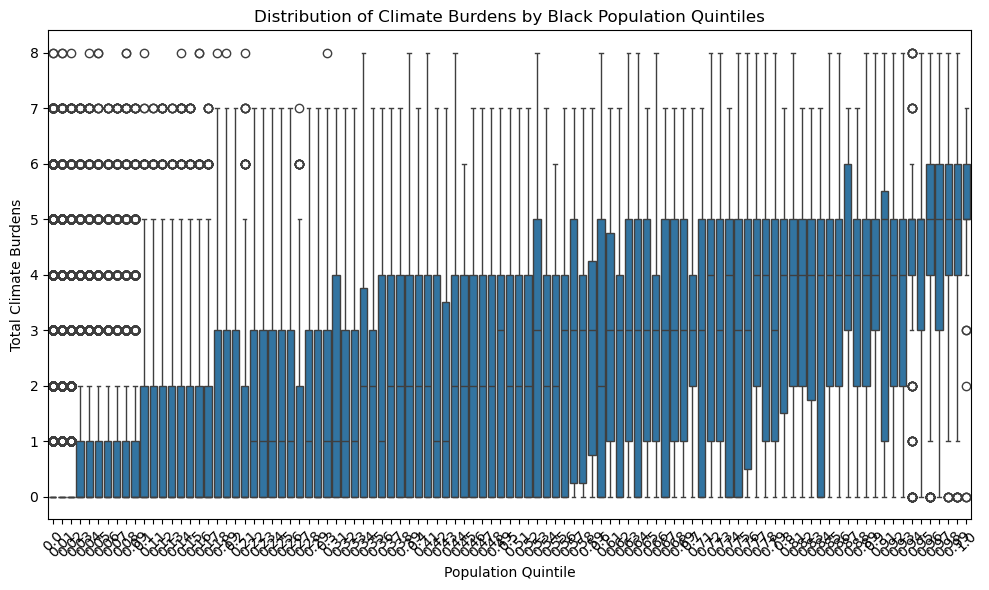

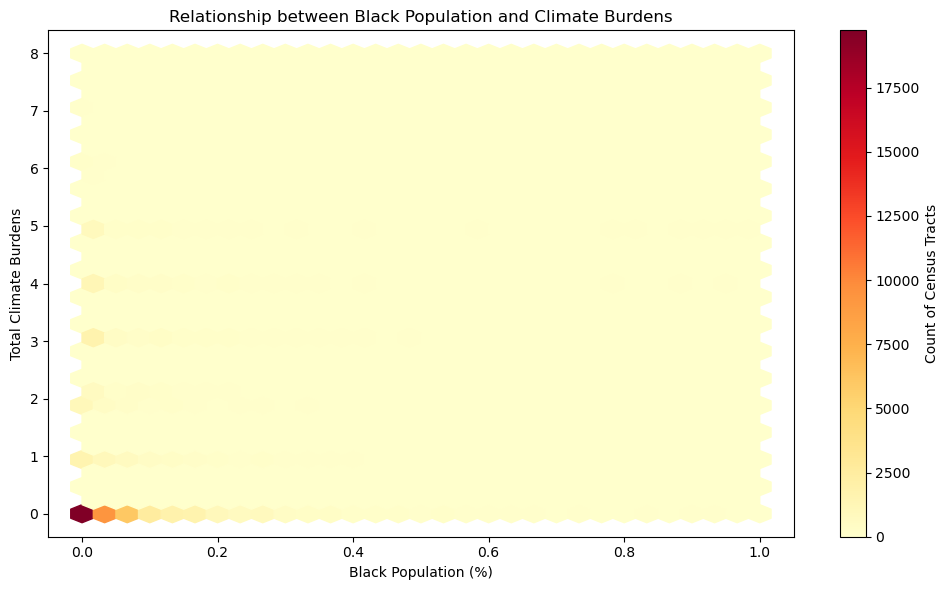

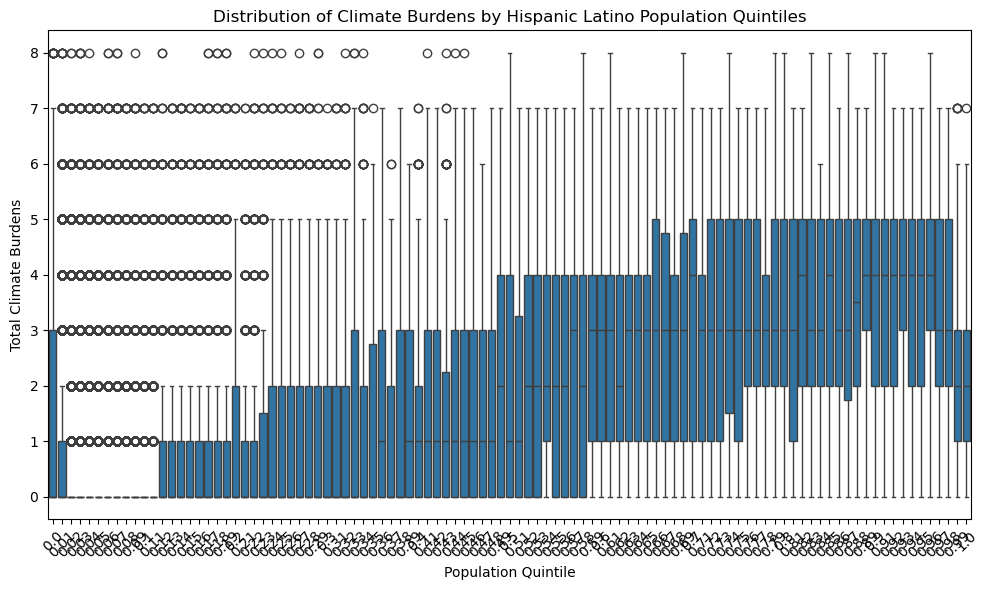

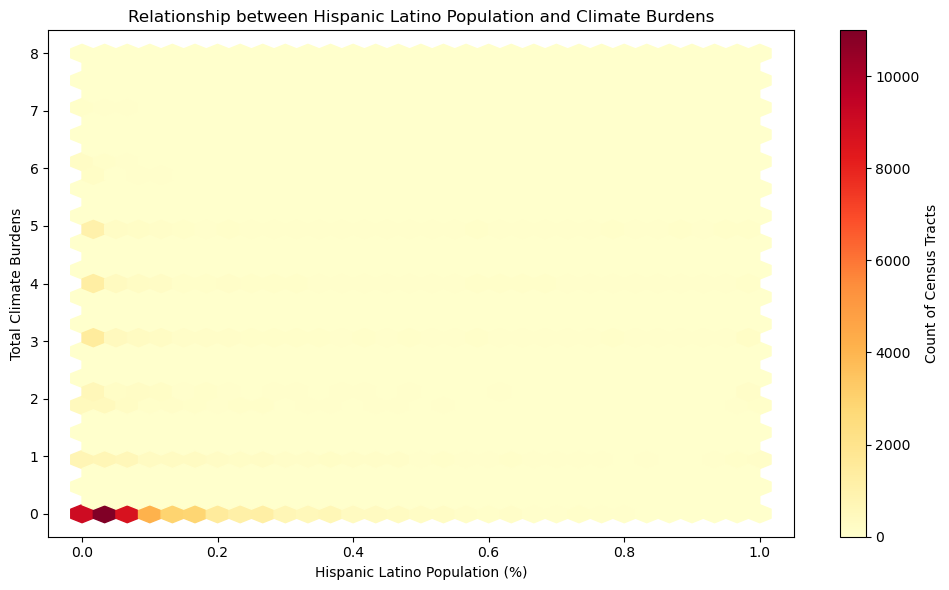

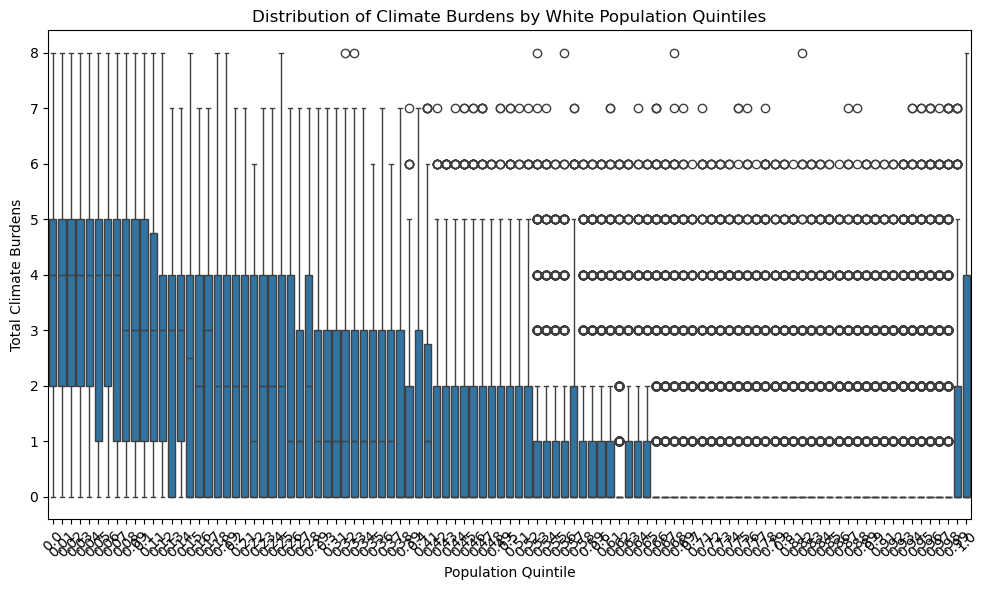

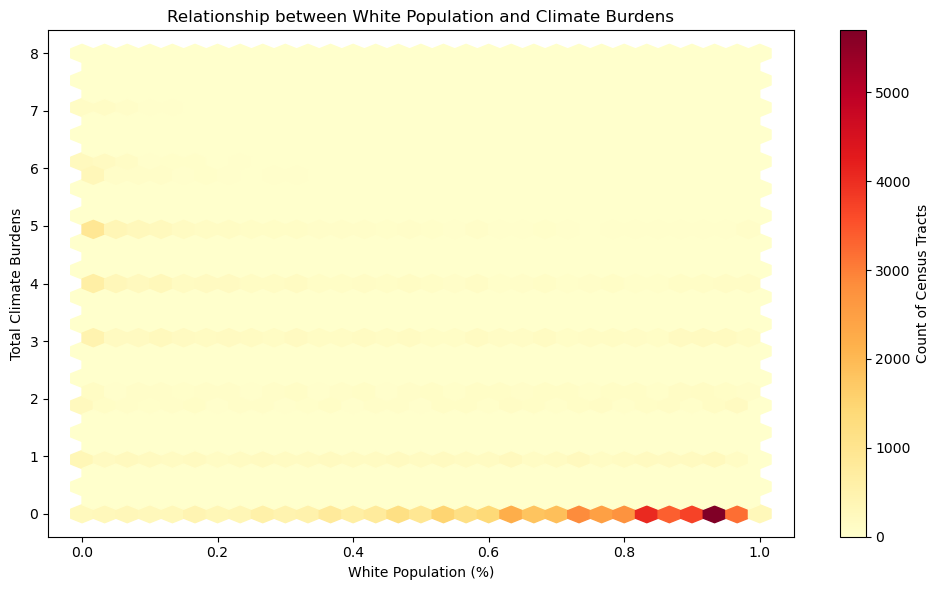

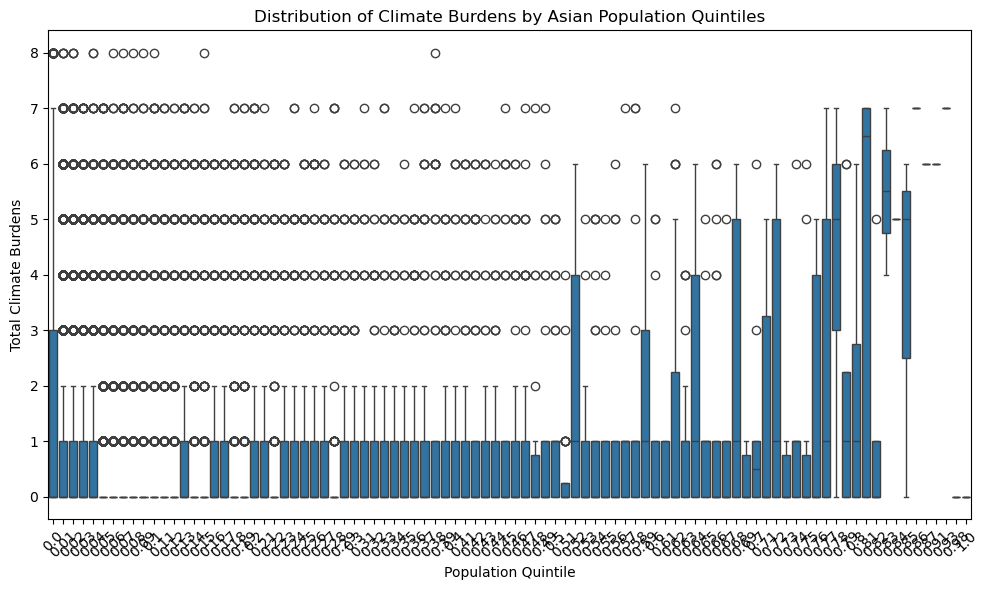

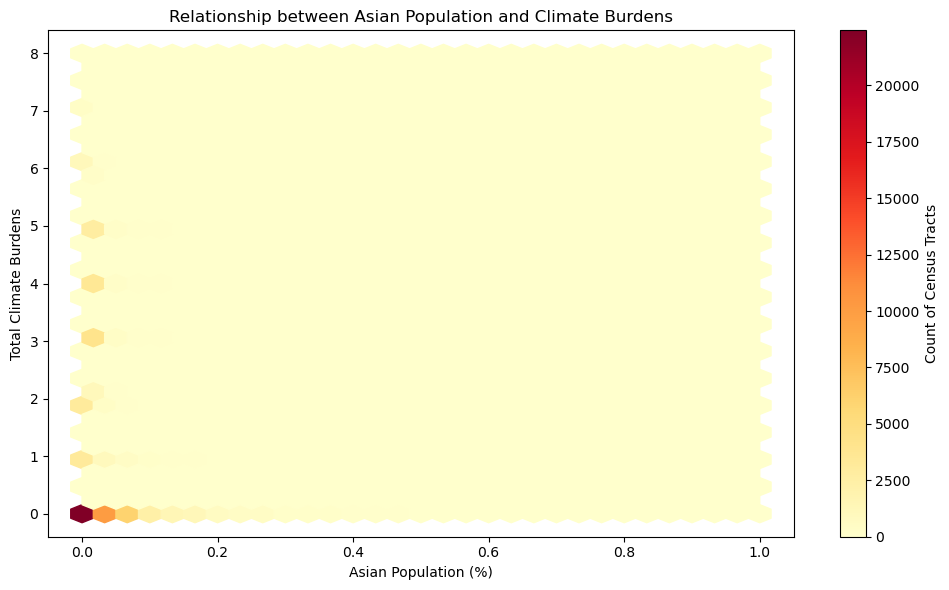

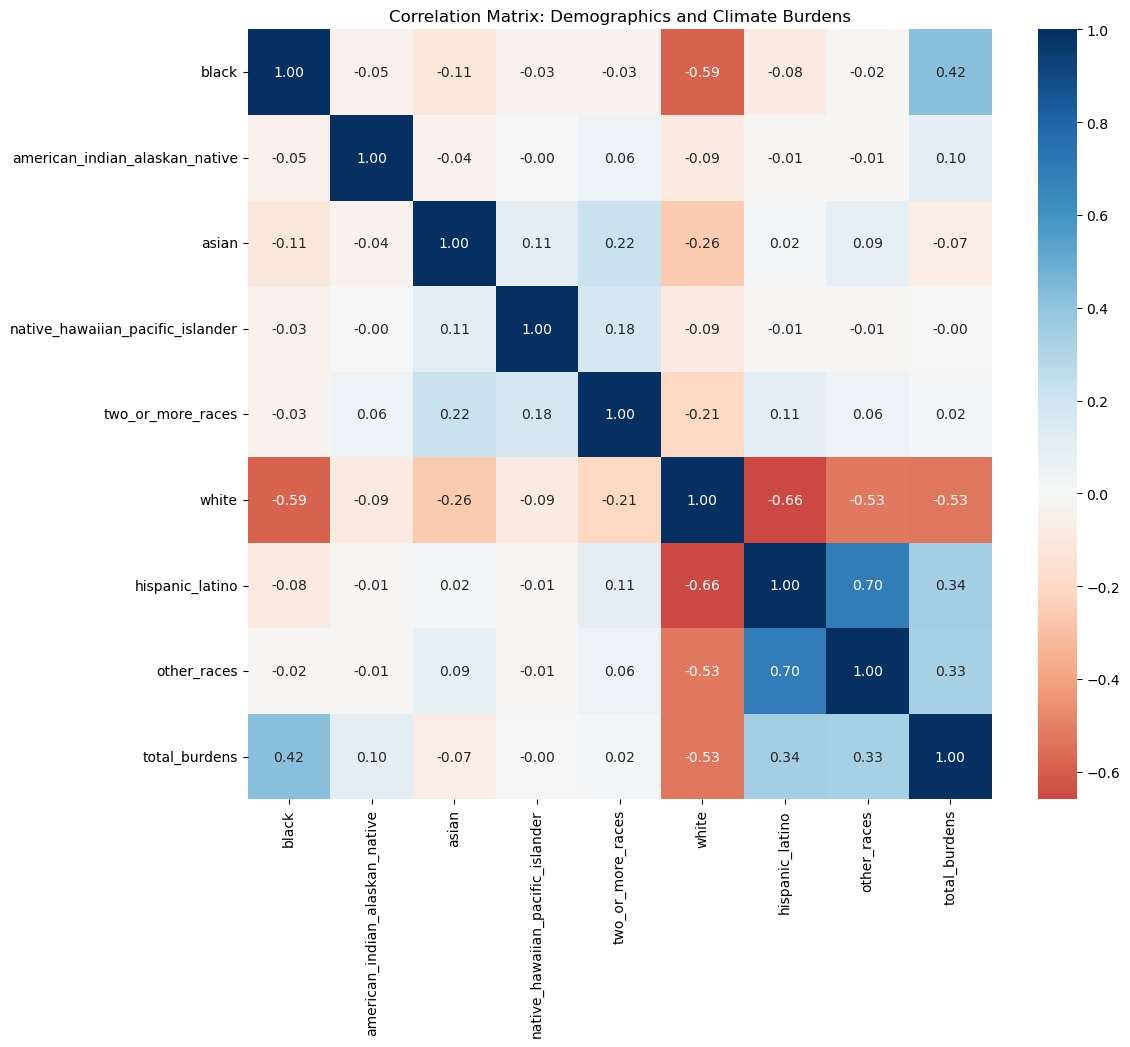

In [11]:
# Option 1: Box plots showing burden distribution by demographic quintiles
def create_demographic_burden_boxplots(dem, demographic_col):
    # Create quintiles for the demographic percentage
    # dem[f'{demographic_col}_quintile'] = pd.qcut(dem[demographic_col], 
    #                                             q=5, 
    #                                             labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4', 'Q5 (Highest)'])
    
    # dem[f'{demographic_col}_quartile'] = pd.qcut(dem[demographic_col], 
    #                                             q=4, 
    #                                             labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'],
    #                                             duplicates='drop')
    
    # For cut, we need to specify the bin edges explicitly to ensure correct labeling
    bins = 4
    min_val = dem[demographic_col].min()
    max_val = dem[demographic_col].max()
    bin_edges = np.linspace(min_val, max_val, bins + 1)
    dem[f'{demographic_col}_quartile'] = pd.cut(dem[demographic_col],
                                                bins=bin_edges,
                                                labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'],
                                                include_lowest=True)
    
    # Create the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dem, x=demographic_col, y='total_burdens')
    plt.title(f'Distribution of Climate Burdens by {demographic_col.replace("_", " ").title()} Population Quintiles')
    plt.xlabel('Population Quintile')
    plt.ylabel('Total Climate Burdens')
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt

# Option 2: Hexbin plot showing relationship between demographic percentage and burdens
def create_hexbin_plot(dem, demographic_col):
    plt.figure(figsize=(10, 6))
    plt.hexbin(dem[demographic_col], 
                dem['total_burdens'], 
                gridsize=30, 
                cmap='YlOrRd')
    
    plt.colorbar(label='Count of Census Tracts')
    plt.title(f'Relationship between {demographic_col.replace("_", " ").title()} Population and Climate Burdens')
    plt.xlabel(f'{demographic_col.replace("_", " ").title()} Population (%)')
    plt.ylabel('Total Climate Burdens')
    plt.tight_layout()
    return plt

# Example usage for multiple demographics
demographic_cols = ['black', 'hispanic_latino', 'white', 'asian']

# Create plots for each demographic group
for demo in demographic_cols:
    # Create and save box plots
    fig = create_demographic_burden_boxplots(dem, demo)
    # fig.savefig(f'{demo}_boxplot.png')
    # plt.close()
    
    # Create and save hexbin plots
    fig = create_hexbin_plot(dem, demo)
    # fig.savefig(f'{demo}_hexbin.png')
    # plt.close()

# Optional: Create a correlation matrix heatmap for all demographic variables
demographic_cols = ['black', 'american_indian_alaskan_native', 'asian', 
                    'native_hawaiian_pacific_islander', 'two_or_more_races', 
                    'white', 'hispanic_latino', 'other_races', 'total_burdens']

plt.figure(figsize=(12, 10))
correlation_matrix = dem[demographic_cols].corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu', 
            center=0, 
            fmt='.2f')
plt.title('Correlation Matrix: Demographics and Climate Burdens')
# plt.tight_layout()
# plt.savefig('correlation_matrix.png')
# plt.close()